# Split Operator Method

### Category: Prerequisites

### Prerequisites: Quantum Mechanics

When cleaning my apartment, sometimes I just grab the nearest dirty thing to me and try to do something to it.  But that is not the most efficient way to get things done.  If I'm planning, I'll first dedicate my attention to one problem, like putting clothing away, then rotate my attention to something else, like dirty dishes.  I can keep focused on just one task and do it well.  Each problem I solve optimally in shorter intervals instead of tackling everything at once.  

That same principle applies to solving partial differential equations.  [1] called this principle one of the big ideas of numerical computation.  In numerics, we call it <b>Strang splitting</b>.  

We will be applying Strang splitting to solve the Schrondinger equation, but people use the same idea to a variety of problems, like ones with different timescales, length scales, or physical processes.  We will be using it to seperate out terms diagonal in position space from terms diagonal in momentum space.  

We can describe a class of general partial differential equations by
\begin{equation}
\frac{\partial}{\partial t}y = L_1(y,t)+L_2(y,t)
\end{equation}
Over a small time step,
\begin{equation}
y(\delta t)= e^{L_1(y,0) \delta t+L_2(y,0) \delta t}y(0)
\end{equation}
For <b>Strang splitting</b>, instead of applying both operators together, we break them up into two.  I'll discuss non-commutivity later.
\begin{equation}
y(\delta t)= e^{L_1 (y,0) \delta t} e^{L_2(y,0) \delta t} y(0) = U_1 U_2 y(0)
\end{equation}
$U_1$ and $U_2$ are evolution operators. We can define
\begin{equation}
\tilde{y(0)}= U_2 y(0)
\end{equation}
so that 
\begin{equation}
y (\delta t) = U_1 \tilde{y}(0)
\end{equation}

### Applying to Quantum Mechanics
Now let's take a look at the Schrodinger Equation:
\begin{equation}
i \hbar \frac{\partial}{\partial t} | \Psi \rangle = \mathcal{H} | \Psi \rangle 
=
\left[ \frac{\hat{p}^2}{2m} + V(x) \right] | \Psi \rangle
=
\left[ \mathcal{H}_p + \mathcal{H}_x \right] | \Psi \rangle
\end{equation}
We can already see how to separate the Hamiltonian.  For ease, let's define our unitary evolution operators,
\begin{equation}
U_p(\delta t)=e^{-\frac{i}{\hbar}\mathcal{H}_p \delta t} 
\;\;\;\;\;
U_x (\delta t)= e^{-\frac{i}{\hbar}\mathcal{H}_x \delta t}
\end{equation}

I mentioned earlier that I would discuss non-communitvity.  We need to do that now.  We can't simply seperate the evolution operator for the full Hamiltonian into two parts, because we would introduce terms proportional to the commutator.  
\begin{equation}
e^{A+B}=e^{A}e^{B}e^{[A,B]}
\end{equation}
$e^{A+B}$ expanded has terms that look like $AB$ <b>and</b> $BA$, whereas $e^{A}e^{B}$ only has terms that look like $AB$.  We lose the symmetry of the expression.  We can gain back an order of accuracy by symmetrizing our formula, calculating a time step by
\begin{equation}
|\Psi (\delta t) \rangle =
U_x (\delta t/2) U_p (\delta t) U_x (\delta t/2)
\end{equation}
But the next step will the start with $U_x (\delta t/2)$ !

\begin{equation}
|\Psi (2 \delta t) \rangle = \left(
U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\frac{\delta t}{2})\right)\left( U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\frac{\delta t}{2}) \right)
\end{equation}
\begin{equation}
= U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\delta t)  U_p (\delta t) U_x (\frac{\delta t}{2})
\end{equation}

All we need to do to add an order of accuracy is start the simulation with $U_x(\delta t/2)$ and end it with $U_x(\delta t/2)$, leaving everything else the same.  Pretty remarkable you can get that much of an improvement for that little work. 


In the spatial domain, the momentum operator involves derivatives and is rather icky.  But in the momentum domain, we only have to multiply by $k^2/2m$.  Thanks to some nicely optimized libraries, we can just transform into the momentum domain with `fft`, solve the momentum problem there, and transform back with `ifft`. 

## Rabi Oscillations

I will demonstrate time evolution by looking at Rabi Oscillations between two harmonic wells.  Quantum wavefuctions can tunnel, so if we have two equal valleys, the wavefunction will tunnel back and forth between the two. 

The tunneling from left to right is the negative of the overlap from right to left.  To see why this is, let's look at the intergrals:
\begin{equation}
\langle \Psi_l | \Psi_r \rangle = \delta(x' - x) \langle \Psi_l | x' \rangle \langle x | \Psi_r \rangle 
\end{equation}

\begin{equation}
=\int \int \Psi_l (x') \Psi_r (x) \delta (x'-x) dx dx' = \int \int \Psi_l (x+u) \Psi_r (x) \delta(u) dx du 
\end{equation}
\begin{equation}
=\int \Psi_l (x) \Psi_r (x) dx = \epsilon
\end{equation}
When we exchange left and right
\begin{equation}
\langle \Psi_r | \Psi_l \rangle 
= \int \int \Psi_l (x') \Psi_r (x) \delta (x-x') dx dx' = \int \int \Psi_l (x+u) \Psi_r (x) \delta (-u) dx du 
\end{equation}
\begin{equation}
= -\int \Psi_l (x) \Psi_R (x) dx = -\epsilon
\end{equation}



To get an idea of what will happen, we will use a qualitative model of two states weakly coupled to each other by a parameter $\epsilon$.  If we have the two minima sufficifiently seperated from each other, the tunneling will happen slowly and will not significantly affect the shape of the eigenfunctions
\begin{equation}i \hbar \frac{\partial}{\partial t}
\begin{bmatrix}
| \Psi_r \rangle  \\
| \Psi_l \rangle 
\end{bmatrix}
= \begin{bmatrix}
E_0  & \epsilon \\ 
-ϵ & E_0 \\
\end{bmatrix}
\begin{bmatrix}
| \Psi_r \rangle \\
| \Psi_l \rangle
\end{bmatrix}
\end{equation}
To analyze this, we solve for the eigenvalues,
\begin{equation}
\lambda^2 - 2 E_0 \lambda + E_0^2 + \epsilon^2 = 0 
\end{equation}

\begin{equation}
\lambda = E_0 \pm \sqrt{E_0^2 -  \left(E_0^2 + \epsilon^2 \right)}
\end{equation}
\begin{equation}
\lambda = E_0 \pm i \epsilon
\end{equation}

\begin{equation}
\vec{v}_{1} = \begin{bmatrix}
| \Psi_r \rangle \\
i |\Psi_l \rangle 
\end{bmatrix}
\;\;\;\;\;
\vec{v}_2 = \begin{bmatrix}
| \Psi_r \rangle \\
-i |\Psi_l \rangle
\end{bmatrix}
\end{equation}

\begin{equation}
e^{- \frac{i}{\hbar} E_0 t} \left( e^{-\frac{i}{\hbar}\sqrt{E_0 \epsilon} t} + e^{\frac{i}{\hbar} \sqrt{E_0 \epsilon} t} \right) 
\begin{bmatrix}
| \Psi_r \rangle \\
| \Psi_l \rangle
\end{bmatrix}
= 2 e^{- \frac{i}{\hbar} E_0 t} \cos \frac{ \sqrt{E_0 \epsilon} t}{\hbar} \begin{bmatrix}
| \Psi_r \rangle \\
| \Psi_l \rangle
\end{bmatrix}
\end{equation}
The eigenfunction on this phenomological model has the standard cycling of the wavefunction, but it also cycles back and forth between the two different sides.  

In [6]:
Pkg.update()
using PyPlot

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Precompiling module URIParser.
This may mean module Compat does not support precompilation but is imported by a module that does.
ERROR: LoadError: Declaring __precompile__(false) is not allowed in files that are being precompiled.
 in require(::Symbol) at .\loading.jl:385
 in include_from_node1(::String) at .\loading.jl:488
 in macro expansion; at .\none:2 [inlined]
 in anonymous at .\<missing>:?
 in eval(::Module, ::Any) at .\boot.jl:234
 in process_options(::Base.JLOptions) at .\client.jl:242
 in _start() at .\client.jl:321
while loading C:\Users\chris\.julia\v0.5\URIParser\src\URIParser.jl, in expression starting on line 10


LoadError: Failed to precompile URIParser to C:\Users\chris\.julia\lib\v0.5\URIParser.ji.

## Input Parameters

In [7]:
# Set Time Parameters
t0=0
tf=40000
dt=.1

# Set Space Grid Parameters
dx=.1 
xmax=8

# How far seperated are the potential minima
seperation=6;

# How often we measure occupation and view the state
nmeasure=1000;

## Automatic Evaluation Parameters

Given the parameters above, we can calculate the following variables that we will use in the code.

Note: `k` Gave me a bit of a headache. The algorithm depends quite a bit on the conventions `fft` decides to use ;(

In [4]:
t=collect(t0:dt:tf)
x=collect(-xmax:dx:xmax)

nt=length(t)
N=length(x)

k = [ collect(0:((N-1)/2)) ; collect(-(N-1)/2:-1) ] *2*π/(N*dx);

occupation=zeros(Complex{Float64},floor(Int,nt/nmeasure),2);

## The Potentials and Evolution Operators

In [5]:
Vx=.5*(abs(x)-seperation/2).^2;
Vk=k.^2/2

Ux=exp(-im*Vx*dt/2);
Uf=exp(-im*Vk*dt);
"potentials and evolvers defined"

"potentials and evolvers defined"

In [1]:
plot(x, Vx)

LoadError: UndefVarError: plot not defined

## The Unperturbed Wavefunctions

The ground state for a harmonic oscillator is a Gaussian
\begin{equation}
\langle x | \Psi \rangle= \Psi (x) = \frac{1}{\pi^{1/4}} e^{-\frac{x^2}{2}}
\end{equation}
We assume $\omega = \hbar = m = 1$ for sake of convenience.


In [3]:
Ψ(x)=π^(-.25)*exp(-x.^2/2)

Ψ (generic function with 1 method)

In [6]:
Ψ1=Ψ(x+seperation/2);
Ψ2=Ψ(x-seperation/2);
Psi0=convert(Array{Complex{Float64},1},Ψ1);

In [9]:
p=plan_fft(Psi);
Psif=p*Psi;
pf=plan_ifft(Psif);

In [10]:
Psi=Psi0
jj=1
for ii in 1:nt
    
    Psi=Psi.*Ux
    Psif=p*Psi
    Psif=Psif.*Uf    
    Psi=pf*Psif
    Psi=Psi.*Ux
    
    if ii%1000 == 0
        overlap[jj,1]=sum(conj(Psi).*Ψ1)*dx
        overlap[jj,2]=sum(conj(Psi).*Ψ2)*dx
    
        clf()
        plot(x[21:141],Vx[21:141]/6,color=".75")
        plot(x,abs(conj(Psi).*Psi))
        now=jj
        title("Wavefunction evolving in double well  \n t: $now")
        xlabel("X")
        ylabel("Probability Density")
        xticks([-3,0,3])
        yticks([0,.4,.8])
        savefig("DoubleWell/img_$now.png")
        
        jj+=1
    end

end

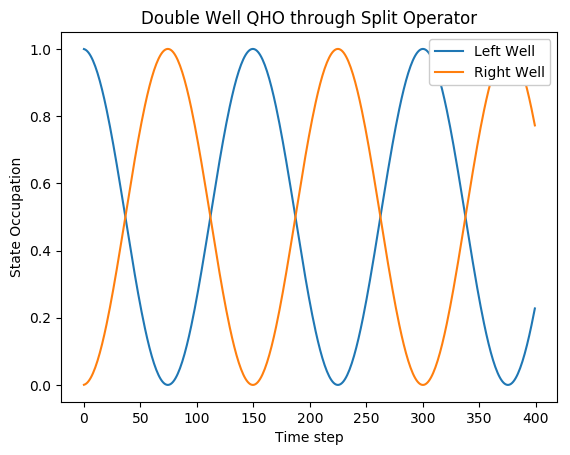

PyObject <matplotlib.text.Text object at 0x0000000027474F60>

In [23]:
pygui(false)
plot(abs(overlap[:,1]).^2,label="Left Well")
plot(abs(overlap[:,2]).^2,label="Right Well")
xlabel("Time step")
ylabel("State Occupation")
legend(loc="upper right",framealpha=1)
title("Double Well QHO through Split Operator")

![gif](Images/SplitOperator/doublewell.gif)

@Inbook{MacNamara2016,
author="MacNamara, Shev
and Strang, Gilbert",
editor="Glowinski, Roland
and Osher, Stanley J.
and Yin, Wotao",
title="Operator Splitting",
bookTitle="Splitting Methods in Communication, Imaging, Science, and Engineering",
year="2016",
publisher="Springer International Publishing",
address="Cham",
pages="95--114",
isbn="978-3-319-41589-5",
doi="10.1007/978-3-319-41589-5_3",
url="http://dx.doi.org/10.1007/978-3-319-41589-5_3"
}